More Images showing segmentation features on fluorescence image (suppl fig)

In [29]:
import tqdm

import scanpy as sc
import anndata as ad
import squidpy as sq

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")


scanpy==1.6.1.dev70+g7f15d22d anndata==0.7.5 umap==0.4.6 numpy==1.19.4 scipy==1.4.1 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.3
squidpy==0.0.0


In [30]:
# load the pre-processed dataset
img = sq.datasets.visium_fluo_image_crop()
adata = sq.datasets.visium_fluo_adata_crop()

# smooth image to make nicer segmentation masks
sq.im.process(img=img, layer="image",  method='smooth', channel_dim='smooth')

# segment
sq.im.segment(img=img, layer="image_smooth", model_group="watershed", channel=0, thresh=None)

In [31]:
# define image layer to use for segmentation
features_kwargs = {'segmentation': {'label_layer': 'segmented_watershed'}}
# calculate segmentation features
sq.im.calculate_image_features(adata, img, layer='image', key_added='features', features_kwargs=features_kwargs, 
                               features='segmentation', spot_scale=1, scale=1.0, mask_circle=True)

/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

In [32]:
# fill nans
adata.obsm['features'].fillna(value=0, inplace=True)

In [33]:
adata.obsm['features']

,segmentation_label,segmentation_area_mean,segmentation_area_std,segmentation_ch-0_mean_intensity_mean,segmentation_ch-0_mean_intensity_std,segmentation_ch-1_mean_intensity_mean,segmentation_ch-1_mean_intensity_std,segmentation_ch-2_mean_intensity_mean,segmentation_ch-2_mean_intensity_std
AAACGAGACGGTTGAT-1,11,274.818182,357.286699,42861.581807,10563.860571,6260.526635,3833.592276,9027.297605,188.897651
AAAGGGATGTAGCAAG-1,16,92.562500,129.055690,55057.597068,8470.036385,4498.286087,167.047796,10322.122964,694.891664
AAATGGCATGTCTTGT-1,13,168.076923,232.138374,35349.995631,5075.079340,12075.953557,13219.440267,8574.368911,3574.414701
AAATGGTCAATGTGCC-1,12,187.833333,153.940916,33826.465299,5079.735956,3589.617504,41.401681,9427.819193,1242.649206
AAATTAACGGGTAGCT-1,5,324.600000,197.286188,41683.947526,8871.660799,10586.790055,9801.220075,10354.879390,3156.098011
...,...,...,...,...,...,...,...,...,...
TTGTCGTTCAGTTACC-1,24,487.333333,1207.386905,51214.429356,13587.773804,4124.628463,615.544318,28987.203068,21185.062379
TTGTGGCCCTGACAGT-1,23,170.521739,168.632317,35208.153013,6010.868556,13129.428486,9260.223055,8667.332124,1617.116548
TTGTTAGCAAATTCGA-1,27,151.000000,198.621919,33852.845474,6345.039170,17646.864750,11649.688775,7078.187306,300.210417
TTGTTCAGTGTGCTAC-1,6,66.500000,122.770450,49552.895442,10894.305856,4547.390501,346.087012,9645.865061,936.713282


In [47]:
# normalise mean intensity features
adata.obsm['norm_features'] = adata.obsm['features'] / 2**16

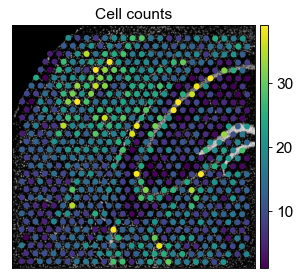

In [35]:
# save ncounts
sc.set_figure_params(facecolor="white", figsize=(8, 4))
fig, ax = plt.subplots(figsize=(8, 4))
sc.pl.spatial(
    sq.pl.extract(adata, 'features'), 
    color=['segmentation_label'], 
    bw=True, 
    title='Cell counts',
    crop_coord=(0,7272,0,7272), 
    show=False,
    ax=ax,
    vmax='p99',
    vmin='p01'
)

ax.axes.xaxis.label.set_visible(False)
ax.axes.yaxis.label.set_visible(False)

plt.savefig('figures/fluo_ncells.png', dpi=300, bbox_inches='tight')

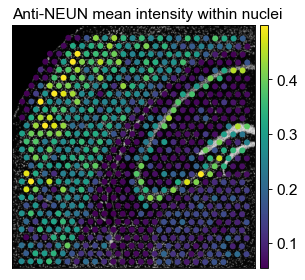

In [56]:
# save mean intensity of anti-neun channel
sc.set_figure_params(facecolor="white", figsize=(8, 4))
fig, ax = plt.subplots(figsize=(8, 4))
sc.pl.spatial(
    sq.pl.extract(adata, 'norm_features'), 
    color=['segmentation_ch-1_mean_intensity_mean'], 
    bw=True, 
    title='',
    crop_coord=(0,7272,0,7272), 
    show=False,
    ax=ax,
    vmax='p99',
    vmin='p01'
)
ax.set_title('Anti-NEUN mean intensity within nuclei', loc='left')
ax.axes.xaxis.label.set_visible(False)
ax.axes.yaxis.label.set_visible(False)

plt.savefig('figures/fluo_anti-neun_intensity.png', dpi=300, bbox_inches='tight')

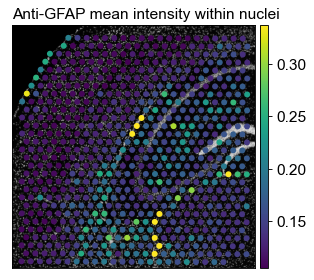

In [57]:
# save mean intensity of anti-gfap channel
sc.set_figure_params(facecolor="white", figsize=(8, 4))
fig, ax = plt.subplots(figsize=(8, 4))
sc.pl.spatial(
    sq.pl.extract(adata, 'norm_features'), 
    color=['segmentation_ch-2_mean_intensity_mean'], 
    bw=True, 
    title='',
    crop_coord=(0,7272,0,7272), 
    show=False,
    ax=ax,
    vmax='p99',
    vmin='p01'
)
ax.set_title('Anti-GFAP mean intensity within nuclei', loc='left')
ax.axes.xaxis.label.set_visible(False)
ax.axes.yaxis.label.set_visible(False)

plt.savefig('figures/fluo_anti-gfap_intensity.png', dpi=300, bbox_inches='tight')

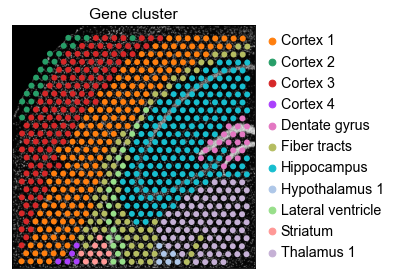

In [74]:
# save clustering
sc.set_figure_params(facecolor="white", figsize=(8, 4))
fig, ax = plt.subplots(figsize=(8, 4))
sc.pl.spatial(
    adata, 
    color=['cluster'], 
    bw=True, 
    title='Gene cluster',
    crop_coord=(0,7272,0,7272), 
    show=False,
    ax=ax,
    vmax='p99',
    vmin='p01'
)

ax.axes.xaxis.label.set_visible(False)
ax.axes.yaxis.label.set_visible(False)

# change legend labels
legend = ax.get_legend()
labels = legend.get_texts()
for i,l in enumerate(labels):
    legend.get_texts()[i].set_text(' '.join(l.get_text().split('_')))

plt.savefig('figures/fluo_clusters.png', dpi=300, bbox_inches='tight')